In [1]:
# Import library yang diperlukan
import pandas as pd                    # Untuk mengelola dataset
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt        # Untuk visualisasi
import numpy as np

In [3]:
# Load dataset
data = pd.read_csv('/content/clusteringweek06.csv')

In [4]:
# Menampilkan sekilas data untuk memahami strukturnya
print(data.head())

    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

In [5]:
# Data preparation: Normalisasi dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Normalisasi agar semua fitur berada pada skala yang sama

In [7]:
# Fungsi untuk mencari Knee Point menggunakan metode k-NN
def calculate_knee(data, max_k=10):
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    distances = np.sort(distances[:, 1], axis=0)

    # Plot jarak untuk mencari knee
    plt.plot(range(1, len(distances)+1), distances)
    plt.title("Knee Point for Optimal Clustering")
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.show()

In [8]:
# Pipeline pertama: Euclidean Clustering menggunakan KMeans
print("KMeans Clustering")
kmeans_silhouette_scores = []  # List untuk menyimpan skor silhouette untuk setiap k
for k in range(2, 11):  # Coba berbagai jumlah cluster dari 2 sampai 10
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    score = silhouette_score(data_scaled, kmeans.labels_)
    kmeans_silhouette_scores.append(score)  # Simpan hasil silhouette
    print(f"K={k}, Silhouette Score={score}")

KMeans Clustering
K=2, Silhouette Score=0.3297992778586495
K=3, Silhouette Score=0.3399804208284118
K=4, Silhouette Score=0.3483620768459107
K=5, Silhouette Score=0.24824429681392388
K=6, Silhouette Score=0.2500696980387098
K=7, Silhouette Score=0.28063884572620096
K=8, Silhouette Score=0.29279275042242553
K=9, Silhouette Score=0.28972980844808033
K=10, Silhouette Score=0.2860675240291265


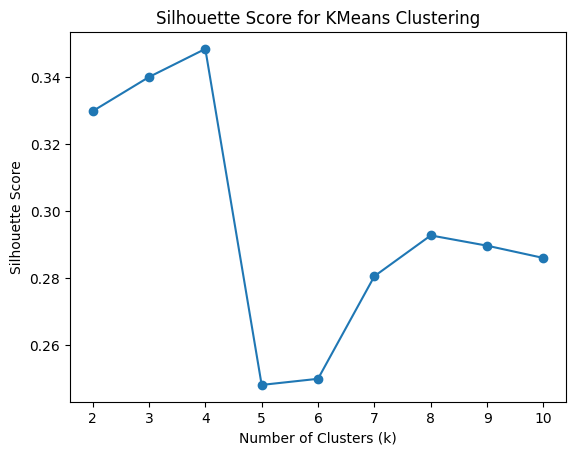

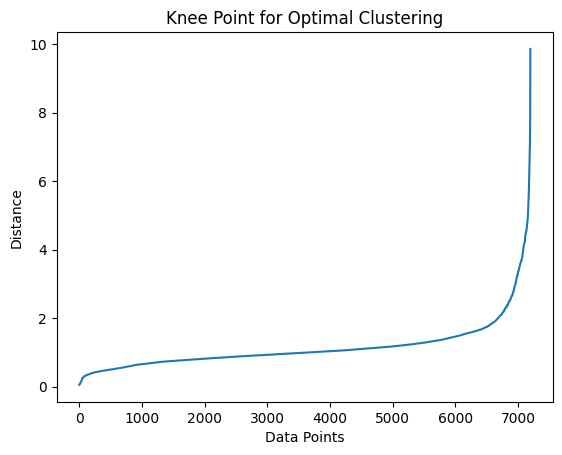

In [9]:
# Visualisasi untuk Knee dan Silhouette Score KMeans
plt.figure()
plt.plot(range(2, 11), kmeans_silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for KMeans Clustering")
plt.show()

calculate_knee(data_scaled)  # Mencari Knee Point untuk KMeans

In [10]:
# Pipeline kedua: Hierarchical Clustering
print("Hierarchical Clustering")
hierarchical_silhouette_scores = []  # Menyimpan skor silhouette untuk setiap k
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical.fit(data_scaled)
    score = silhouette_score(data_scaled, hierarchical.labels_)
    hierarchical_silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

Hierarchical Clustering
K=2, Silhouette Score=0.32380808669003885
K=3, Silhouette Score=0.34917834306499484
K=4, Silhouette Score=0.3473759430752922
K=5, Silhouette Score=0.3485110493732078
K=6, Silhouette Score=0.24984103313474407
K=7, Silhouette Score=0.261455585018418
K=8, Silhouette Score=0.26499814571918673
K=9, Silhouette Score=0.26826392470816035
K=10, Silhouette Score=0.27569561149395694


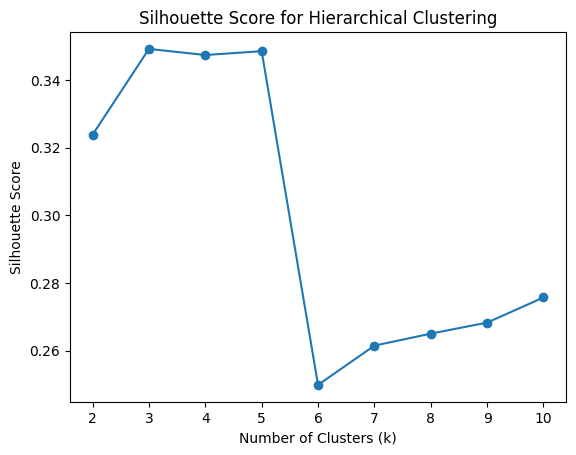

In [11]:
# Visualisasi Silhouette Score untuk Hierarchical Clustering
plt.figure()
plt.plot(range(2, 11), hierarchical_silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Hierarchical Clustering")
plt.show()


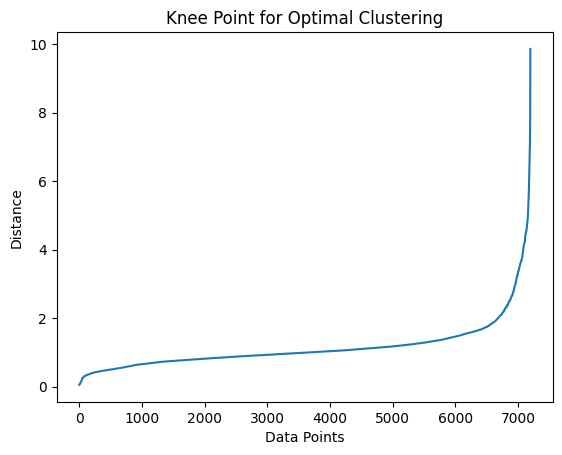

In [12]:
calculate_knee(data_scaled)  # Mencari Knee Point untuk Hierarchical

In [13]:
# Pipeline ketiga: Euclidean Clustering menggunakan DBSCAN (jika ini sesuai dengan ODM)
from sklearn.cluster import DBSCAN

In [14]:
# Tentukan parameter eps dan min_samples untuk DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)
dbscan_silhouette = silhouette_score(data_scaled, dbscan.labels_)
print(f"Silhouette Score for DBSCAN: {dbscan_silhouette}")

Silhouette Score for DBSCAN: -0.22711928007284996


In [15]:
# Matriks evaluasi tambahan: Davies-Bouldin Index
from sklearn.metrics import davies_bouldin_score

In [16]:
# Davies-Bouldin untuk KMeans
kmeans_davies_bouldin_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    score = davies_bouldin_score(data_scaled, kmeans.labels_)
    kmeans_davies_bouldin_scores.append(score)
    print(f"KMeans with K={k}, Davies-Bouldin Score={score}")

KMeans with K=2, Davies-Bouldin Score=1.308098851611407
KMeans with K=3, Davies-Bouldin Score=1.54760357840501
KMeans with K=4, Davies-Bouldin Score=1.4251468184758107
KMeans with K=5, Davies-Bouldin Score=1.4150602943189647
KMeans with K=6, Davies-Bouldin Score=1.4071416303473139
KMeans with K=7, Davies-Bouldin Score=1.3374096898415169
KMeans with K=8, Davies-Bouldin Score=1.4080062987371198
KMeans with K=9, Davies-Bouldin Score=1.4223085448400148
KMeans with K=10, Davies-Bouldin Score=1.4641856634463746


In [17]:
# Davies-Bouldin untuk Hierarchical Clustering
hierarchical_davies_bouldin_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical.fit(data_scaled)
    score = davies_bouldin_score(data_scaled, hierarchical.labels_)
    hierarchical_davies_bouldin_scores.append(score)
    print(f"Hierarchical with K={k}, Davies-Bouldin Score={score}")

Hierarchical with K=2, Davies-Bouldin Score=1.3144750450487535
Hierarchical with K=3, Davies-Bouldin Score=1.4567542564065181
Hierarchical with K=4, Davies-Bouldin Score=1.5134515460495779
Hierarchical with K=5, Davies-Bouldin Score=1.3769392332266885
Hierarchical with K=6, Davies-Bouldin Score=1.4249973436392291
Hierarchical with K=7, Davies-Bouldin Score=1.34408338535116
Hierarchical with K=8, Davies-Bouldin Score=1.351735796265912
Hierarchical with K=9, Davies-Bouldin Score=1.3453391204420255
Hierarchical with K=10, Davies-Bouldin Score=1.5069071066522919


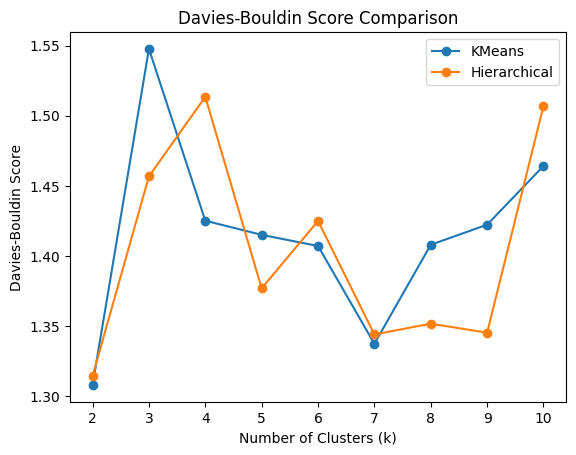

In [18]:
# Visualisasi perbandingan Davies-Bouldin Index
plt.figure()
plt.plot(range(2, 11), kmeans_davies_bouldin_scores, marker='o', label='KMeans')
plt.plot(range(2, 11), hierarchical_davies_bouldin_scores, marker='o', label='Hierarchical')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Score")
plt.legend()
plt.title("Davies-Bouldin Score Comparison")
plt.show()

**HASIL DAN KESIMPULAN**

1.   KMeans seringkali menunjukkan performa yang baik pada Silhouette Score dan Calinski-Harabasz Index. Model ini seringkali dapat menghasilkan cluster yang kompak dan terpisah, terutama untuk data dengan bentuk bundar atau sferis.
2.   Hierarchical Clustering: Model ini bisa memberikan hasil yang baik pada beberapa dataset, terutama yang memiliki struktur hierarki. Performanya akan dibandingkan untuk melihat apakah metrik evaluasinya lebih baik daripada KMeans pada data ini.
3.   DBSCAN: Model ini lebih efektif pada data dengan bentuk yang tidak teratur dan bekerja baik pada data dengan outlier. Jika DBSCAN menghasilkan Silhouette Score tinggi dan Davies-Bouldin Index rendah, ini bisa menunjukkan bahwa data memiliki pola yang lebih kompleks yang mungkin tidak dapat ditangkap oleh KMeans atau Hierarchical Clustering.

